    TME 2 MAPSI
    NEHLIL Samy - BOUTALEB Mohamed Allaa Eddine
    Groupe 5

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# MAPSI - TME  - Rappels de Proba/stats

- Bernouli Binomiale
- Ind√©pendance de lois
- Ind√©pendance conditionnelle
- agrum

## I- La planche de Galton (<font color="red"> obligatoire</font>)

### I.1- Loi de Bernoulli
√âcrire une fonction `bernoulli: float ->int` qui prend en argument la param√®tre $p \in [0,1]$ et qui renvoie al√©atoirement $0$ (avec la probabilit√© $1-p$) ou $1$ (avec la probabilit√© $p$).

In [4]:
def bernoulli(p):
    # On g√©n√®re un nombre al√©atoire entre 0 et 1
    # On le compare √† p : si c'st <p ->0 sinon 1
    return 0 if np.random.random() > p else 1

In [5]:
bernoulli(0.5)

0

In [6]:
# test de la m√©thode pr√©c√©dente (triviale pour Bernoulli mais utile en g√©n√©ral)
print(np.array([bernoulli(0.3) for i in range(300)]).mean()) # moyenne de 300 tirages pour p = 0.3 => ~0.3
print(np.array([bernoulli(0.5) for i in range(300)]).mean()) # moyenne de 300 tirages pour p = 0.5 => ~0.5
print(np.array([bernoulli(1) for i in range(300)]).mean())   # moyenne de 300 tirages pour p = 1   => =1

0.24666666666666667
0.46
1.0


### I.2- Loi binomiale
√âcrire une fonction `binomiale: int , float -> int` qui prend en argument un entier $n$ et $p \in [0,1]$ et qui renvoie al√©atoirement un nimbre tir√© selon la distribution ${\cal B}(n,p)$.

In [7]:
def binomiale(n,p):
    # Une binomiale correspond √† une loi de BERNOULI appliqu√© n fois
    # Le nombre de succ√®s est le nombre de valeurs √† 1
    a = [bernoulli(p) for i in range(n)]
    return np.sum(a)

In [8]:
# TEST
# esp√©rance = np
print(np.array([binomiale(10,0.3) for i in range(300)]).mean()) # moyenne de 300 tirages pour n=10 p = 0.3 => 3
print(np.array([binomiale(20,0.3) for i in range(300)]).mean()) # moyenne de 300 tirages pour n=20 p = 0.3 => 6
print(np.array([binomiale(10,0.8) for i in range(300)]).mean()) # moyenne de 300 tirages pour n=10 p = 0.8 => 8

3.02
5.953333333333333
7.946666666666666


### I.3- Histogramme de la loi binomiale
<img src="tme2_Galton.jpg" title="Planche de Galton" style="float: right;">

Dans cette question, on consid√®re une planche de Galton de hauteur $n$. On rappelle que des b√¢tons horizontaux (oranges) sont clou√©s √† cette planche comme le montre la figure ci-contre. 

 Des billes bleues tombent du haut de la planche et, √† chaque niveau, se retrouvent √† la verticale d'un des b√¢tons. Elles vont alors tomber soit √† gauche, soit √† droite du b√¢ton, jusqu'√† atteindre le bas de la planche. Ce dernier est constitu√© de petites boites dont les bords sont symbolis√©s par les lignes verticales grises. 
 
Chaque boite renferme des billes qui sont pass√©es exactement le m√™me nombre de fois √† droite des b√¢tons oranges. Par exemple, la boite la plus √† gauche renferme les billes qui ne sont jamais pass√©es √† droite d'un b√¢ton, celle juste √† sa droite renferme les billes pass√©es une seule fois √† droite d'un b√¢ton et toutes les autres fois √† gauche, et ainsi de suite. 

La r√©partition des billes dans les boites suit donc une loi binomiale ${\cal B}(n,0.5)$. 

√âcrire un script qui cr√©e un tableau de $1000$ cases dont le contenu correspond √† $1000$ instanciations de la loi binomiale ${\cal B}(n,0.5)$. Afin de voir la r√©partition des billes dans la planche de Galton, tracer l'histogramme de ce tableau. Vous pourrez utiliser la fonction hist de matplotlib.pyplot: 

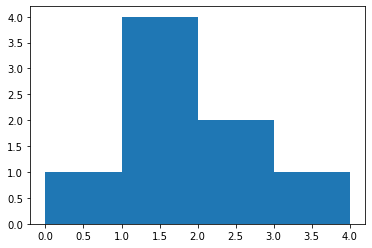

In [9]:
import matplotlib.pyplot as plt

plt.hist ([0,1,2,1,2,4,1,1], 4);

Pour le nombre de bins, calculez le nombre de valeurs diff√©rentes dans votre tableau.

In [10]:
n,p = 10, 0.5   # Param√®tres de la loi binomiale B(n,p)
nbCases = 1000

tab = [binomiale(n,p) for i in range(nbCases)]
fig, ax = plt.subplots()
ax.hist (tab,linewidth = 1, edgecolor = 'black')

(array([  2.,  13.,  44., 108., 213., 236., 226., 104.,  43.,  11.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

### Commentaire:
On remarque qu'on peut bien approximer la loi binomiale par une loi normale.

## II- Visualisation d'ind√©pendances (<font color="red"> obligatoire</font>)

### II.1- Loi normale centr√©e r√©duite
<img src="tme2_normale.jpg" title="Planche de Galton" style="float: right;">

On souhaite visualiser la fonction de densit√© de la loi normale. Pour cela, on va cr√©er un ensemble de $k$ points $(x_i,y_i$), pour des $x_i$ √©qui-espac√©s variant de $-2œÉ$ √† $2œÉ$, les $y_i$ correspondant √† la valeur de la fonction de densit√© de la loi normale centr√©e de variance $œÉ^2$, autrement dit ${\cal N}(0,œÉ^2)$.

√âcrire une fonction `normale : int , float -> float np.array` qui, √©tant donn√© un param√®tre entier `k` impair et un param√®tre r√©el `sigma` renvoie l'`array numpy` des $k$ valeurs $y_i$. Afin que l'`array numpy` soit bien symm√©trique, on l√®vera une exception si $k$ est pair.

In [11]:
def normale ( k, sigma ):
    if (k%2==0):
        raise ValueError("k is pair")
    X = np.linspace(-2*sigma, 2*sigma, num=k)
    Y = 1/(sigma * np.sqrt(2*np.pi))*np.exp(-0.5*((X-0)/sigma)**2)
    return np.asarray(X), np.asarray(Y)

V√©rfier la validit√© de votre fonction en affichant gr√¢ce √† la fonction plot les points g√©n√©r√©s dans une figure. 

In [12]:
X, Y = normale (101, 5)
fig, ax = plt.subplots()
ax.plot(X, Y);

### II.2- Distribution de probabilit√© affine
<img src="tme2_lineaire.jpg" title="Distribution affine" style="float: right;">

Dans cette question, on consid√®re une g√©n√©ralisation de la distribution uniforme: une distribution affine, c'est-√†-dire que la fonction de densit√© est une droite, mais pas forc√©ment horizontale, comme le montre la figure ci-contre. 

√âcrire une fonction `proba_affine : int , float -> float np.array` qui, comme dans la question pr√©c√©dente, va g√©n√©rer un ensemble de $k$ points $y_i, i=0,...,k‚àí1$, repr√©sentant cette distribution (param√©tr√©e par sa pente `slope`). On v√©rifiera ici aussi que l'entier $k$ est impair. Si la pente est √©gale √† $0$, c'est-√†-dire si la distribution est uniforme, chaque point $y_i$ devrait √™tre √©gal √† $\frac{1}{k}$ (afin que $\sum y_i=1$). Si la pente est diff√©rente de $0$, il suffit de choisir, $\forall i=0,...,k‚àí1$,

$$y_i=\frac{1}{k}+(i‚àí\frac{k‚àí1}{2})√óslope$$

Vous pourrez ais√©ment v√©rifier que, ici aussi, $\sum y_i=1$. Afin que la distribution soit toujours positive (c'est quand m√™me un minimum pour une distribution de probabilit√©), il faut que la pente slope ne soit ni trop grande ni trop petite. Le bout de code ci-dessous l√®vera une exception si la pente est trop √©lev√©e et indiquera la pente maximale possible. 

In [13]:
def proba_affine ( k, slope ):
    if k % 2 == 0:
        raise ValueError ( 'le nombre k doit etre impair' )
    if abs ( slope  ) > 2. / ( k * k ):
        raise ValueError ( 'la pente est trop raide : pente max = ' +
        str ( 2. / ( k * k ) ) )
    #votre code
    X = np.arange(k)
    Y = 1/k + (X-(k-1)/2)*slope
    return np.asarray(X), np.asarray(Y)

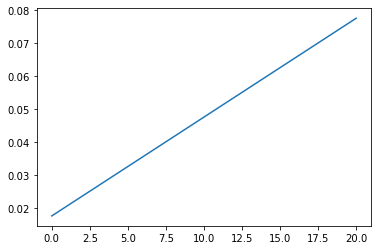

In [14]:
X, Y = proba_affine(21, 0.003)

fig, ax = plt.subplots()
ax.plot(X, Y);

### II.3- Distribution jointe
√âcrire une fonction `Pxy : float np.array , float np.array -> float np.2D-array` qui, √©tant donn√© deux tableaux numpy de nombres r√©els √† $1$ dimension g√©n√©r√©s par les fonctions des questions pr√©c√©dentes et repr√©sentant deux distributions de probabilit√©s $P(A)$ et $P(B)$, renvoie la distribution jointe $P(A,B)$ sous forme d'un tableau numpy √† $2$ dimensions de nombres r√©els, en supposant que $A$ et $B$ sont des variables al√©atoires ind√©pendantes. Par exemple, si:

In [15]:
PA = np.array ( [0.2, 0.7, 0.1] )
PB = np.array ( [0.4, 0.4, 0.2] )

alors `Pxy(A,B)` renverra le tableau :
```
np.array([[ 0.08,  0.08,  0.04],
          [ 0.28,  0.28,  0.14],
          [ 0.04,  0.04,  0.02]])
```

In [16]:
def Pxy(x,y):
    #votre code
    a = x.shape[0]
    a1,b1 = np.reshape(x,(a,1)), np.reshape(y,(a,1))
    return np.dot(a1,b1.transpose())

In [17]:
PA = np.array ( [0.2, 0.7, 0.1] )
PB = np.array ( [0.4, 0.4, 0.2] )

Pxy(PA,PB)

array([[0.08, 0.08, 0.04],
       [0.28, 0.28, 0.14],
       [0.04, 0.04, 0.02]])

### II.4- Affichage de la distribution jointe
<img src="tme2_jointe.jpg" title="Distribution jointe" style="float: right;">

Le code ci-dessous permet d'afficher en 3D une probabilit√© jointe g√©n√©r√©e par la fonction pr√©c√©dente. Ex√©cutez-le avec une probabilit√© jointe r√©sultant de la combinaison d'une loi normale et d'une distribution affine. 

Si la commande `%matplotlib notebook` fonctione, vous pouvez interagir avec la courbe. Si le contenu de la fen√™tre est vide, redimensionnez celle-ci et le contenu devrait appara√Ætre. Cliquez √† la souris √† l'int√©rieur de la fen√™tre et bougez la souris en gardant le bouton appuy√© afin de faire pivoter la courbe. Observez sous diff√©rents angles cette courbe. Refaites l'exp√©rience avec une probaiblit√© jointe r√©sultant de deux lois normales. Essayez de comprendre ce que signifie, visuellement, l'ind√©pendance probabiliste. Vous pouvez √©galement recommencer l'exp√©rience avec le logarithme des lois jointes.


In [18]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook  
# essayer `%matplotib notebook` pour interagir avec la visualisation 3D

def dessine ( P_jointe ):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace ( -3, 3, P_jointe.shape[0] )
    y = np.linspace ( -3, 3, P_jointe.shape[1] )
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, P_jointe, rstride=1, cstride=1 )
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('P(A) * P(B)')
    plt.show ()

In [19]:
dessine(np.array([[ 0.08,  0.08,  0.04],
                  [ 0.28,  0.28,  0.14],
                  [ 0.04,  0.04,  0.02]]))

<IPython.core.display.Javascript object>

## Probabilit√© jointe r√©sultante de deux lois normales

In [20]:
#votre code
Xn, Yn = normale (101, 5)
fig, ax = plt.subplots()
ax.plot(Xn, Yn);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


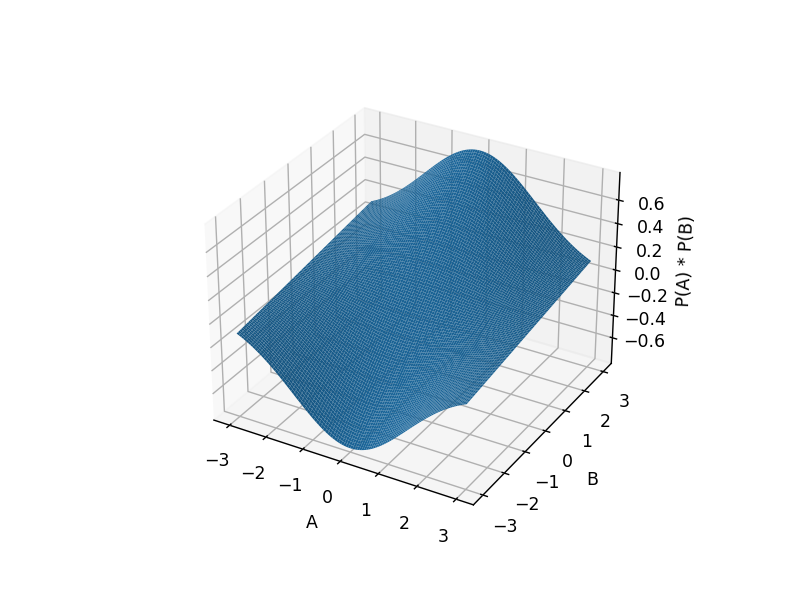

In [22]:
P_jointe_n = Pxy(Xn,Yn)
dessine(P_jointe_n)

## Probabilit√© jointe r√©sultante de logarihme de deux lois normales

In [26]:
#votre code
Xn, Yn = normale(101, 5)
Xn_log, Yn_log = np.log(Xn), np.log(Yn)
fig, ax = plt.subplots()
ax.plot(Xn_log, Yn_log);

<ipython-input-26-6ca02007c11f>:3: RuntimeWarning: divide by zero encountered in log
  Xn_log, Yn_log = np.log(Xn), np.log(Yn)
<ipython-input-26-6ca02007c11f>:3: RuntimeWarning: invalid value encountered in log
  Xn_log, Yn_log = np.log(Xn), np.log(Yn)


<IPython.core.display.Javascript object>

In [ ]:
P_jointe_n_log = Pxy(Xn_log,Yn_log)
dessine(P_jointe_n)

## III- Ind√©pendances conditionnelles (<font color="red"> obligatoire</font>)

Dans cet exercice, on consid√®re quatre variables al√©atoires bool√©ennes $X$, $Y$, $Z$ et $T$ ainsi que leur distribution jointe $P(X,Y,Z,T)$ encod√©e en python de la mani√®re suivante : 

In [ ]:
# creation de P(X,Y,Z,T)
P_XYZT = np.array([[[[ 0.0192,  0.1728],
                     [ 0.0384,  0.0096]],

                    [[ 0.0768,  0.0512],
                     [ 0.016 ,  0.016 ]]],

                   [[[ 0.0144,  0.1296],
                     [ 0.0288,  0.0072]],

                    [[ 0.2016,  0.1344],
                     [ 0.042 ,  0.042 ]]]])

Ainsi, $\forall (x,y,z,t) \in \{0,1\}^4$, `P_XYZT[x][y][z][t]` correspond √† $P(X=x,Y=y,Z=z,T=t)$ ou, en version abr√©g√©e, √† $P(x,y,z,t)$. 

### III.1- Ind√©pendance de X et T conditionnellement √† (Y,Z)
On souhaite tester si les variables al√©atoires $X$ et $T$ sont ind√©pendantes conditionnellement √† $(Y,Z)$. Il s'agit donc de v√©rifer que dans la loi $P$, $$P(X,T|Y,Z)=P(X|Y,Z)\cdot P(T|Y,Z)$$


Pour cela, tout d'abord, calculer √† partir de `P_XYZT` le tableau `P_YZ` repr√©sentant la distribution $P(Y,Z)$. On rappelle que $$P(Y,Z)=\sum_{X,T} P(X,Y,Z,T)$$

Le tableau `P_YZ` est donc un tableau √† deux dimensions, dont la premi√®re correspond √† $Y$ et la deuxi√®me √† $Z$. Si vous ne vous √™tes pas tromp√©(e)s, vous devez obtenir le tableau suivant : 
```
np.array([[ 0.336,  0.084],
          [ 0.464,  0.116]])
```

Ainsi $P(Y=0,Z=1)=$ `P_YZ[0][1]` $=0.084$

In [ ]:
P_XYZT

In [ ]:
# Calcul de la loi jointe P(Y,Z)
P_YZ = np.zeros((2,2))
for x in range(P_XYZT.shape[0]):
    for y in range(P_XYZT.shape[1]):
        for z in range(P_XYZT.shape[2]):
            for t in range(P_XYZT.shape[3]):
                P_YZ[y,z] += P_XYZT[x,y,z,t]
P_YZ

In [ ]:
# M√©thode plus optimis√©e pour le faire
P_YZ = np.asarray(P_XYZT.sum((0,3)))
P_YZ

Ensuite, calculer le tableau `P_XTcondYZ` repr√©sentant la distribution $P(X,T|Y,Z)$. Ce tableau a donc 4 dimensions, chacune correspondant √† une des variables al√©atoires. De plus, les valeurs de `P_XTcondYZ` sont obtenues en utilisant la formule des probabilit√©s conditionnelles: $$P(X,T|Y,Z)=\frac{P(X,Y,Z,T)}{P(Y,Z)}$$

Check: `P_XTcondYZ` =

  `[[[[0.05714286 0.51428571]
   [0.45714286 0.11428571]]
  [[0.16551724 0.11034483]
   [0.13793103 0.13793103]]`


In [ ]:
# Calcul de la loi P(XT|YZ)
P_XTcondYZ = np.zeros((2,2,2,2)) # initialisation
# Id√©e : boucle sur chaque √©l√©ment de la table de la loi jointe P_XYZT
#        Division par l'√©l√©ment P(YZ) correspondant de la loi jointe P_YZ
for x in range(P_XYZT.shape[0]):
    for y in range(P_XYZT.shape[1]):
        for z in range(P_XYZT.shape[2]):
            for t in range(P_XYZT.shape[3]):
                P_XTcondYZ[x,y,z,t] = P_XYZT[x,y,z,t]/P_YZ[y,z]
P_XTcondYZ

Calculer √† partir de `P_XTcondYZ` les tableaux √† 3 dimensions `P_XcondYZ` et `P_TcondYZ` repr√©sentant respectivement les distributions $P(X|Y,Z)$ et $P(T|Y,Z)$. On rappelle que $$P(X|Y,Z)=‚àë_Y P(X,T|Y,Z)$$
Check:
`P_XcondYZ=
[[[0.57142857 0.57142857]
  [0.27586207 0.27586207]]
 [[0.42857143 0.42857143]
  [0.72413793 0.72413793]]]
`

In [ ]:
# Calcul de la loi P(XT|YZ)
P_XcondYZ = np.zeros((2,2,2)) # initialisation
# Id√©e : boucle sur chaque √©l√©ment de la table de la loi P_XTcondYZ
#        Division par l'√©l√©ment P(YZ) correspondant de la loi jointe P_YZ
for x in range(P_XTcondYZ.shape[0]):
    for y in range(P_XTcondYZ.shape[1]):
        for z in range(P_XTcondYZ.shape[2]):
            for t in range(P_XTcondYZ.shape[3]):
                P_XcondYZ[x,y,z] += P_XTcondYZ[x,y,z,t]
P_XcondYZ

In [ ]:
# Une autre mani√®re de faire
P_XcondYZ = P_XTcondYZ.sum((3))
P_XcondYZ

In [ ]:
# Calcul de la loi P(XT|YZ)
P_TcondYZ = np.zeros((2,2,2)) # initialisation
# Id√©e : boucle sur chaque √©l√©ment de la table de la loi P_XTcondYZ
#        Division par l'√©l√©ment P(YZ) correspondant de la loi jointe P_YZ
for x in range(P_XTcondYZ.shape[0]):
    for y in range(P_XTcondYZ.shape[1]):
        for z in range(P_XTcondYZ.shape[2]):
            for t in range(P_XTcondYZ.shape[3]):
                P_TcondYZ[y,z,t] += P_XTcondYZ[x,y,z,t]
P_TcondYZ

In [ ]:
# Une autre mani√®re de faire
P_TcondYZ = P_XTcondYZ.sum((0))
P_TcondYZ

Enfin, tester si $X$ et $T$ sont ind√©pendantes conditionnellement √† $(Y,Z)$: si c'est bien le cas, on doit avoir $$P(X,T|Y,Z)=P(X|Y,Z)√óP(T|Y,Z)$$ 

In [ ]:
# Structure du code
# On boucle sur tous les √©l√©ments de P_XTcondYZ
# Si on trouve un √©l√©ment tq ùëÉ(ùëã,ùëá|ùëå,ùëç)!=ùëÉ(ùëã|ùëå,ùëç)√óùëÉ(ùëá|ùëå,ùëç) on s'arr√™te avec une exception
# et on positionne le drapeau de non-ind√©pendance
flag = True
try:
    for x in range(P_XTcondYZ.shape[0]):
        for y in range(P_XTcondYZ.shape[1]):
            for z in range(P_XTcondYZ.shape[2]):
                for t in range(P_XTcondYZ.shape[3]):
                    if (round(P_XTcondYZ[x,y,z,t],4) != round(round((P_XcondYZ[x,y,z],4)*round(P_TcondYZ[y,z,t],4)),4):
                        flag = False
                        raise StopIteration
except StopIteration:
    pass

print('X et T ne sont pas ind√©pendants' if not flag else 'X et T sont ind√©pendants')

### III.2- Ind√©pendance de X et (Y,Z)

On souhaite maintenant d√©terminer si $X$ et $(Y,Z)$ sont ind√©pendantes. Pour cela, commencer par calculer √† partir de `P_XYZT` le tableau `P_XYZ` repr√©sentant la distribution $P(X,Y,Z)$. 

Ensuite, calculer √† partir de `P_XYZ` les tableaux `P_X` et `P_YZ` repr√©sentant respectivement les distributions $P(X)$ et $P(Y,Z)$. On rappelle que $$P(X)=‚àë_Y‚àë_Z P(X,Y,Z)$$

Si vous ne vous √™tes pas tromp√©(e), P_X doit √™tre √©gal au tableau suivant : 
```
np.array([ 0.4,  0.6])
```

In [ ]:
#votre code
P_XYZ = P_XYZT.sum((3))
P_X = P_XYZ.sum((1,2))
P_YZ = P_XYZ.sum((0))
P_X

In [ ]:
P_YZ

In [ ]:
P_XYZ

Enfin, si $X$ et $(Y,Z)$ sont bien ind√©pendantes, on doit avoir $$P(X,Y,Z)=P(X)√óP(Y,Z)$$

Check : Non, ce n'est pas ind√©pendant

In [38]:
#votre code
flag = False
try:
    for x in range(P_XYZ.shape[0]):
        for y in range(P_XYZ.shape[1]):
            for z in range(P_XYZ.shape[2]):
                if (P_XYZ[x,y,z] != P_X[x]*P_YZ[y,z]):
                    flag = True
                    raise StopIteration
except StopIteration:
    pass

print('X et T ne sont pas ind√©pendants' if flag else 'X et T sont ind√©pendants')

NameError: name 'P_XYZ' is not defined

## IV- Ind√©pendances conditionnelles et consommation m√©moire  (<font color="red"> obligatoire</font>)

Le but de cet exercice est d'exploiter les probabilit√©s conditionnelles et les ind√©pendances conditionnelles <b>afin de d√©composer une probabilit√© jointe en un produit de "petites probabilit√©s conditionnelles"</b>. Cela permet de stocker des probabilit√©s jointes de grandes tailles sur des ordinateurs "standards". Au cours de l'exercice, vous allez donc partir d'une probabilit√© jointe et, progressivement, construire un programme qui identifie ces ind√©pendances conditionnelles.

Pour simplifier, dans la suite de cet exercice, nous allons consid√©rer un ensemble $X_0,‚Ä¶,X_n$ <b>de variables al√©atoires binaires</b> (elles ne peuvent prendre que 2 valeurs : 0 et 1). 

### Simplification du code : utilisation de pyAgrum

Manipuler des probabilit√©s et des op√©rations sur des probabilit√©s complexes est difficiles avec les outils classiques. La difficult√© principale est certainement le probl√®me du mapping entre axe et variable al√©atoire. `pyAgrum` propose une gestion de `Potential` qui sont des tableaux multidimensionnels dont les axes sont caract√©ris√©s par des variables et sont donc non ambig√ºs.

Par exemple, apr√®s l'initiation du `Potential PABCD` :

In [39]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

X,Y,Z,T=[gum.LabelizedVariable(x,x,2) for x in "XYZT"]
pXYZT=gum.Potential().add(T).add(Z).add(Y).add(X)
pXYZT[:]=[[[[ 0.0192,  0.1728],
            [ 0.0384,  0.0096]],
           [[ 0.0768,  0.0512],
            [ 0.016 ,  0.016 ]]],
          [[[ 0.0144,  0.1296],
            [ 0.0288,  0.0072]],
           [[ 0.2016,  0.1344],
            [ 0.042 ,  0.042 ]]]]

On peut alors utiliser la m√©thode `margSumOut` qui supprime les variables par sommations: `p.margSumOut(['X','Y'])` correspond √† calculer $\sum_{X,Y} p$

La r√©ponse a question III.1 se calcule donc ainsi :

In [40]:
pXT_YZ=pXYZT/pXYZT.margSumOut(['X','T'])
pX_YZ=pXT_YZ.margSumOut(['T'])
pT_YZ=pXT_YZ.margSumOut(['X'])

if pXT_YZ==pX_YZ*pT_YZ:
    print("=> X et T sont ind√©pendants conditionnellemnt √† Y et Z")
else:
    print("=> pas d'ind√©pendance trouv√©e")

=> X et T sont ind√©pendants conditionnellemnt √† Y et Z



- pXYZT.margSumOut(['X','T']) : pr√©cise les variables qu'on supprime par sommation
- pXYZT.margSumIn(['X','T']) : pr√©cise la variable qu'on garde par sommation


La r√©ponse √† la question III.2 se calcule ainsi :

In [41]:
pXYZ=pXYZT.margSumOut("T")
pYZ=pXYZ.margSumOut("X")
pX=pXYZ.margSumOut(["Y","Z"])
if pXYZ==pX*pYZ:
    print("=> X et YZ sont ind√©pendants")
else:
    print("=> pas d'ind√©pendance trouv√©e")

=> pas d'ind√©pendance trouv√©e


In [42]:
gnb.sideBySide(pXYZ,pX,pYZ,pX*pYZ,
               captions=['$P(X,Y,Z)$','$P(X)$','$P(Y,Z)$','$P(X)\cdot P(Y,Z)$'])

`asia.txt` contient la description d'une probabilit√© jointe sur un ensemble de $8$ variables al√©atoires binaires (256 param√®tres). Le fichier est produit √† partir du site web suivant `http://www.bnlearn.com/bnrepository/`.

Le code suivant permet de lire ce fichier et d'en r√©cup√©rer la probabilit√© jointe (sous forme d'une `gum.Potential`) qu'il contient : 

In [43]:
def read_file ( filename ):
    """
    Renvoie les variables al√©atoires et la probabilit√© contenues dans le
    fichier dont le nom est pass√© en argument.
    """
    Pres = gum.Potential ()
    vars=[]

    with open ( filename, 'r' ) as fic:
        # on rajoute les variables dans le potentiel
        nb_vars = int ( fic.readline () )
        for i in range ( nb_vars ):
            name, domsize = fic.readline ().split ()
            vars.append(name)
            variable = gum.LabelizedVariable(name,name,int (domsize))
            Pres.add(variable)

        # on rajoute les valeurs de proba dans le potentiel
        cpt = []
        for line in fic:
            cpt.append ( float(line) )
        Pres.fillWith( cpt )
    return vars,Pres

vars,Pjointe=read_file('asia.txt')
# afficher Pjointe est un peu d√©licat (retire le commentaire de la ligne suivante)
# Pjointe

print('Les variables : '+str(vars))

Les variables : ['visit_to_Asia?', 'tuberculosis?', 'smoking?', 'lung_cancer?', 'tuberculosis_or_lung_cancer?', 'bronchitis?', 'positive_Xray?', 'dyspnoea?']


In [44]:
# Noter qu'il existe une fonction margSumIn qui, √† l'inverse de MargSumOut, √©limine 
# toutes les variables qui ne sont pas dans les arguments
Pjointe.margSumIn(['tuberculosis?','lung_cancer?'])

(pyAgrum.Potential<double>@0x175d3450890) 
      ||  tuberculosis?    |
lung_c||0        |1        |
------||---------|---------|
0     || 0.0006  | 0.0544  |
1     || 0.0098  | 0.9352  |

### IV.1- test d'ind√©pendance conditionnelle

En utilisant la m√©thode `margSumIn` (voir juste au dessus), √©crire une fonction `conditional_indep: Potential,str,str,list[str]->bool` qui rend vrai si dans le `Potential`, on peut lire l'ind√©pendance conditionnelle.

Par exemple, l'appel

`conditional_indep(Pjointe,'bronchitis?', 'positive_Xray?',['tuberculosis?','lung_cancer?'])` 

v√©rifie si bronchitis est ind√©pendant de `posititve_Xray` conditionnellement √† `tuberculosis?` et `lung_cancer?`

D'un point de vue g√©n√©ral, on v√©rifie que $X$ et $Y$ sont ind√©pendants conditionnellement √† $Z_1,\cdots,Z_d$ par l'√©galit√© :
$$P(X,Y|Z_1,\cdots,Z_d)=P(X|Z_1,\cdot,Z_d)\cdot P(Y|Z_1,\cdots,Z_d)$$

Ces trois probabilit√©s sont calculables √† partir de la loi jointe de $P(X,Y,Z_1,\cdots,Z_d)$.

<em>Remarque</em> V√©rifier l'√©galit√© `P==Q` de 2 `Potential` peut √™tre probl√©matique si les 2 sont des r√©sultats de calcul : il peut exister une petite variation. Un meilleur test est de v√©rifier `(P-Q).abs().max()<epsilon` avec `epsilon` assez petit.

In [45]:
def conditional_indep(P,X,Y,Zs, epsilon = 1e-10):
    P_XYZs = P.margSumIn([X, Y] + Zs)
    if Zs != []:
        P_Zs = P_XYZs.margSumIn(Zs) 
        P_XYcondZs = P_XYZs / P_Zs
    else:
        P_XYcondZs = P_XYZs
    P_XcondZs = P_XYcondZs.margSumOut(Y) 
    P_YcondZs = P_XYcondZs.margSumOut(X)

    return (P_XYcondZs - P_XcondZs * P_YcondZs).abs().max() < epsilon

In [46]:
conditional_indep(Pjointe,
                  'bronchitis?', 
                  'positive_Xray?',
                  ['tuberculosis?','lung_cancer?'])
# Test : doit renvoyer True

True

In [47]:
conditional_indep(Pjointe,
                  'bronchitis?', 
                  'visit_to_Asia?',
                  [])
# Test : doit renvoyer True

True

### IV.2- Factorisation compacte de loi jointe

On sait que si un ensemble de variables al√©atoires ${\cal S} = \{X_{i_0},\ldots,X_{i_{n-1}}\}$ peut √™tre partitionn√© en deux sous-ensembles $\cal K$ et $\cal L$ (c'est-√†-dire tels que ${\cal K} \cap {\cal L} = \emptyset$ et ${\cal K} \cup {\cal L} = \{X_{i_0},\ldots,X_{i_{n-1}}\}$) tels qu'une variable $X_{i_n}$ est ind√©pendante de ${\cal L}$ conditionnellement √† ${\cal K}$, alors:

$$P(X_{i_n}|X_{i_0},\ldots,X_{i_{n-1}}) = P(X_{i_n} | {\cal K},{\cal L}) = P(X_{i_n} | {\cal K})$$

C'est ce que nous avons vu au cours n¬∞2 (cf. d√©finition des probabilit√©s conditionnelles). Cette formule est int√©ressante car elle permet de r√©duire la taille m√©moire consomm√©e pour stocker $P(X_{i_n}|X_{i_0},\ldots,X_{i_{n-1}})$: il suffit en effet de stocker uniquement $P(X_{i_n} | {\cal K})$ pour obtenir la m√™me information.

√âcrire une fonction `compact_conditional_proba: Potential,str-> Potential` qui, √©tant donn√© une probabilit√© jointe $P(X_{i_0},\ldots,X_{i_n})$, une variable al√©atoire $X_{i_n}$, retourne cette probabilit√© conditionnelle $P(X_{i_n} | {\cal K})$. Pour cela, nous vous proposons l'algorithme it√©ratif suivant:

```
K=S
Pour tout X in K:
  Si X ind√©pendante de Xin conditionnellement √† K\{X) alors
    Supprimer X de K
retourner P(Xin|K)$
```

Trois petites aides :

1- La fonction prec√©dente `conditional_indep` devrait vous servir...

2- Obtenir la liste des noms des variables dans un `Potential` se fait par l'attribut  
```
P.var_names
```

3- Afin que l'affichage soit plus facile √† comprendre, il peut √™tre judicieux de placer la variable $X_{i_n}$ en premier dans la liste des variables du Potential, ce que l'on peut faire avec le code suivant : 
```
proba = proba.putFirst(Xin)
```



In [48]:
def compact_conditional_proba(P,Xin):
    K = P.var_names.copy()
    K.remove(Xin)
    for X in K:
        K.remove(X)
        if not conditional_indep(P, X, Xin, K):
            K.append(X)
    pXK = P.margSumIn([Xin] + K)
    if K != []:
        P_K = pXK.margSumIn(K) 
        P_XcondK = pXK / P_K
    else:
        P_XcondK = pXK
    return P_XcondK.putFirst(Xin)

In [49]:
compact_conditional_proba(Pjointe,"visit_to_Asia?")

C:\Users\Studies\anaconda3\lib\site-packages\pyAgrum\pyAgrum.py:8538: UserWarning: 
** pyAgrum.Potential.var_names is obsolete in pyAgrum>0.22.9. Please use pyAgrum.Potential.names.

  warnings.warn("\n** pyAgrum.Potential.var_names is obsolete in pyAgrum>0.22.9. Please use pyAgrum.Potential.names.\n")


(pyAgrum.Potential<double>@0x175d34508b0) 
                           ||  visit_to_Asia?   |
tuberc|smokin|tuberc|positi||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 0.0481  | 0.9519  |
1     |0     |0     |0     || 0.0096  | 0.9904  |
0     |1     |0     |0     || 0.0481  | 0.9519  |
1     |1     |0     |0     || 0.0096  | 0.9904  |
0     |0     |1     |0     || 0.0481  | 0.9519  |
1     |0     |1     |0     || 0.0096  | 0.9904  |
[...4 more line(s) ...]
0     |1     |0     |1     || 0.0481  | 0.9519  |
1     |1     |0     |1     || 0.0096  | 0.9904  |
0     |0     |1     |1     || 0.0481  | 0.9519  |
1     |0     |1     |1     || 0.0096  | 0.9904  |
0     |1     |1     |1     || 0.0481  | 0.9519  |
1     |1     |1     |1     || 0.0096  | 0.9904  |

Le compactage de la loi jointe par rapport √† `visit_to_Asia?` doit donner:
<img src="compact_asia.png" title="Distribution compacte">
On voit bien que la cible ne d√©pend plus de toutes les autres variables

In [50]:
compact_conditional_proba(Pjointe,"dyspnoea?")

(pyAgrum.Potential<double>@0x175d3450970) 
                           ||  dyspnoea?        |
tuberc|lung_c|tuberc|bronch||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 0.9000  | 0.1000  |
1     |0     |0     |0     || 0.9000  | 0.1000  |
0     |1     |0     |0     || 0.9000  | 0.1000  |
1     |1     |0     |0     || 0.9000  | 0.1000  |
0     |0     |1     |0     || 0.7000  | 0.3000  |
1     |0     |1     |0     || 0.7000  | 0.3000  |
[...4 more line(s) ...]
0     |1     |0     |1     || 0.8000  | 0.2000  |
1     |1     |0     |1     || 0.8000  | 0.2000  |
0     |0     |1     |1     || 0.1000  | 0.9000  |
1     |0     |1     |1     || 0.1000  | 0.9000  |
0     |1     |1     |1     || 0.1000  | 0.9000  |
1     |1     |1     |1     || 0.1000  | 0.9000  |

### IV.3- Cr√©ation d'un r√©seau bay√©sien

Un r√©seau bay√©sien est simplement la d√©composition d'une distribution de probabilit√© jointe en un produit de probabilit√©s conditionnelles: vous avez vu en cours que $P(A,B) = P(A|B)P(B)$, et ce quel que soient les ensembles de variables al√©atoires disjoints $A$ et $B$. En posant $A = X_n$ et $B = \{X_0,\ldots,X_{n-1}\}$, on obtient donc:

$$P(X_0,\ldots,X_n) = P(X_n | X_0,\ldots,X_{n-1}) P(X_0,\ldots,X_{n-1})$$

On peut r√©it√©rer cette op√©ration pour le terme de droite en posant $A = X_{n-1}$ et $B=\{X_0,\ldots,X_{n-2}\}$, et ainsi de suite. Donc, par r√©currence, on a:

$$P(X_0,\ldots,X_n) = P(X_0) \times \prod_{i=1}^n P(X_i | X_0,\ldots,X_{i-1} )$$

Si on applique √† chaque terme $P(X_i | X_0,\ldots,X_{i-1} )$ la fonction `compact_conditional_proba`, on obtient une d√©composition:

$$P(X_0,\ldots,X_n) = P(X_0) \times \prod_{i=1}^n P(X_i | {\cal K_i})$$

avec $K_i \subseteq \{X_0,\ldots,X_{i-1}\}$}. Cette d√©composition est dite ''compacte'' car son stockage n√©cessite en pratique beaucoup moins de m√©moire que celui de la distribution jointe. C'est ce que l'on appelle un r√©seau bay√©sien.

√âcrire une fonction `create_bayesian_network : Potential -> Potential list` qui, √©tant donn√© une probabilit√© jointe, vous renvoie la liste des $P(X_i | {\cal K_i})$. Pour cela, il vous suffit d'appliquer l'algorithme suivant:

```
liste = [] 
P = P(X_0,...,X_n)
Pour i de n √† 0 faire:
  calculer Q = compact_conditional_proba(P,X_i)
  afficher la liste des variables de Q
  rajouter Q √† liste
  supprimer X_i de P par marginalisation

retourner liste
```

Il est int√©ressant ici de noter les affichages des variables de Q: comme toutes les variables sont binaires, Q n√©cessite uniquement (2 puissance le nombre de ces variables) nombres r√©els. Ainsi une probabilit√© sur 3 variables ne n√©cessite que {$2^3=8$} nombres r√©els. 


In [72]:
def create_bayesian_network(P):
    P0 = gum.Potential(P)
    rb = []
    K = P0.var_names
    print(K)
    for x in K[::-1]:
        Q = compact_conditional_proba(P0, x)
        rb.append(Q)
        P0 = P0.margSumOut([x])
    return rb

In [73]:
rb = create_bayesian_network(Pjointe)
rb

['dyspnoea?', 'positive_Xray?', 'bronchitis?', 'tuberculosis_or_lung_cancer?', 'lung_cancer?', 'smoking?', 'tuberculosis?', 'visit_to_Asia?']


[(pyAgrum.Potential<double>@0x175d346f8d0) 
                            ||  visit_to_Asia?   |
 tuberc|smokin|tuberc|positi||0        |1        |
 ------|------|------|------||---------|---------|
 0     |0     |0     |0     || 0.0481  | 0.9519  |
 1     |0     |0     |0     || 0.0096  | 0.9904  |
 0     |1     |0     |0     || 0.0481  | 0.9519  |
 1     |1     |0     |0     || 0.0096  | 0.9904  |
 0     |0     |1     |0     || 0.0481  | 0.9519  |
 1     |0     |1     |0     || 0.0096  | 0.9904  |
 [...4 more line(s) ...]
 0     |1     |0     |1     || 0.0481  | 0.9519  |
 1     |1     |0     |1     || 0.0096  | 0.9904  |
 0     |0     |1     |1     || 0.0481  | 0.9519  |
 1     |0     |1     |1     || 0.0096  | 0.9904  |
 0     |1     |1     |1     || 0.0481  | 0.9519  |
 1     |1     |1     |1     || 0.0096  | 0.9904  |,
 (pyAgrum.Potential<double>@0x175d346f630) 
                            ||  tuberculosis?    |
 smokin|lung_c|tuberc|positi||0        |1        |
 ------|------|----

### IV.4- Gain en compression

On souhaite observer le gain en termes de consommation m√©moire obtenu par votre d√©composition. Si `P` est un `Potential`, alors `P.toarray().size` est √©gal √† la taille (le nombre de param√®tres) de la table `P`. Calculez donc le nombre de param√®tres n√©cessaires pour stocker la probabilit√© jointe lue dans le fichier `asia.txt` ainsi que la somme des nombres de param√®tres des tables que vous avez cr√©√©es gr√¢ce √† votre fonction `create_bayesian_network`. 

Check: le r√©sultat attendu est : taille rb : 110   taille jointe : 256

In [74]:
# votre code
print(Pjointe.toarray().size)
print(sum([x.toarray().size for x in rb]))

256
142


## V- Applications pratiques (optionnelle)

La technique de d√©composition que vous avez vue est effectivement utilis√©e en pratique. Vous pouvez voir le gain que l'on peut obtenir sur diff√©rentes distributions de probabilit√© du site :

http://www.bnlearn.com/bnrepository/

Cliquez sur le nom du dataset que vous voulez visualiser et t√©l√©chargez son .bif ou .dsl. Afin de visualiser le contenu du fichier, vous allez utiliser pyAgrum. Le code suivant vous permettra alors de visualiser votre dataset: la valeur indiqu√©e apr√®s "domainSize" est la taille de la probabilit√© jointe d'origine (en nombre de param√®tres) et celle apr√®s "dim" est la taille de la probabilit√© sous forme compacte (somme des tailles des probabilit√©s conditionnelles compactes). 

In [75]:
# chargement de pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# chargement du fichier bif ou dsl
bn = gum.loadBN ( "asia.bif" )

# affichage de la taille des probabilit√©s jointes compacte et non compacte
print(bn)

# affichage graphique du r√©seau bay√©sien
bn

BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}


(pyAgrum.BayesNet<double>@0x175d348c7f0) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

In [76]:
# chargement de pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# chargement du fichier bif ou dsl
bn = gum.loadBN ("cancer.bif")

# affichage de la taille des probabilit√©s jointes compacte et non compacte
print(bn)

# affichage graphique du r√©seau bay√©sien
bn

BN{nodes: 5, arcs: 4, domainSize: 32, dim: 20}


(pyAgrum.BayesNet<double>@0x175d3468930) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 20}

In [77]:
# chargement de pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# chargement du fichier bif ou dsl
bn = gum.loadBN ( "water.bif" )

# affichage de la taille des probabilit√©s jointes compacte et non compacte
print(bn)

# affichage graphique du r√©seau bay√©sien
bn

BN{nodes: 32, arcs: 66, domainSize: 10^17.7667, dim: 13484}


(pyAgrum.BayesNet<double>@0x175d3469680) BN{nodes: 32, arcs: 66, domainSize: 10^17.7667, dim: 13484}